In [77]:
import pandas as pd
import matplotlib.pyplot as plt

data = 'data.json'

In [78]:
df = pd.read_json(data)
ex = pd.DataFrame([x for x in df.data])
ex = ex.drop(columns = ["session_id", "client_time", "location"])
ex = ex[(ex.category == "Sports")|(ex.category == "Environment")]
final = ex[ex.event_name == "Fund Project"]

In [79]:
final

,category,event_name,gender,age,marital_status,device,amount
16,Sports,Fund Project,M,18-24,married,android,31.0
35,Sports,Fund Project,M,18-24,married,android,40.0
78,Sports,Fund Project,F,18-24,single,android,53.0
100,Sports,Fund Project,F,18-24,married,iOS,48.0
131,Sports,Fund Project,M,45-54,single,android,27.0
...,...,...,...,...,...,...,...
49984,Environment,Fund Project,M,18-24,married,android,23.0
49989,Sports,Fund Project,M,18-24,single,iOS,37.0
49994,Environment,Fund Project,F,35-44,single,android,35.0
49995,Sports,Fund Project,F,18-24,married,iOS,35.0


In [80]:
age_group = list(set(final.age))
age_group.sort()
total_dono = []
for x in age_group:
    z = final[final.age == x]
    total_dono.append(len(z.index))
total_dono

[4186, 1005, 1032, 1031, 1014]

<BarContainer object of 5 artists>

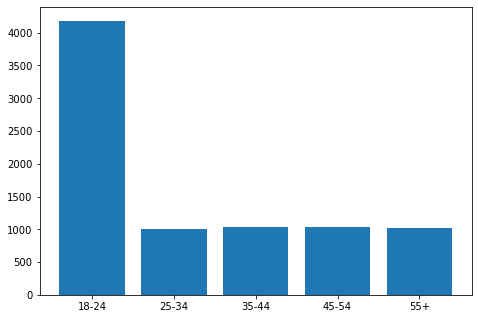

In [81]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(age_group, total_dono)


In [91]:
total_age = []
total_age_dono = []

for x in age_group:
    z = ex[ex.age == x]
    total_age.append(len(z.index))
    y = z[z.event_name == "Fund Project"]
    total_age_dono.append(len(y.index))

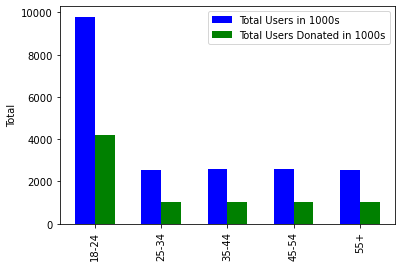

In [92]:
import numpy as np
x = np.arange(5)
ax1 = plt.subplot(1,1,1)
w = 0.3
plt.xticks(x+w/2, age_group, rotation='vertical')
tot = ax1.bar(x, total_age, width=w, color="b", align='center')
dono = ax1.bar(x+w, total_age_dono, width=w, color="g", align='center')
plt.ylabel('Total')
# ax2 = ax1.twinx()
# dono = ax2.bar(x+w, total_age_dono, width=w, color='g', align='center')
# plt.ylabel('Total Donated')
plt.legend([tot, dono], ["Total Users in 1000s", "Total Users Donated in 1000s"])
plt.show()

In [88]:
gender_dono = []
gender_cat = ["M", "F", "U"]
for x in gender_cat:
    z = final[final.gender == x]
    gender_dono.append(len(z.index))
gender_dono

[3751, 3893, 624]

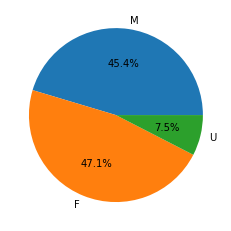

In [120]:
labels = "M", "F", "U"
plt.pie(gender_dono, labels = labels, autopct = '%1.1f%%')
plt.show()